In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68557_R')

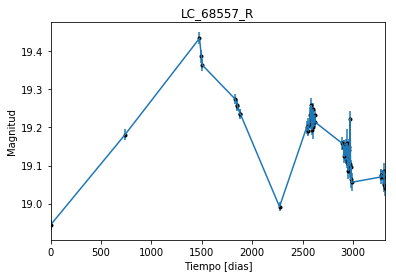

In [2]:
data = np.genfromtxt('LC_68557_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68557_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

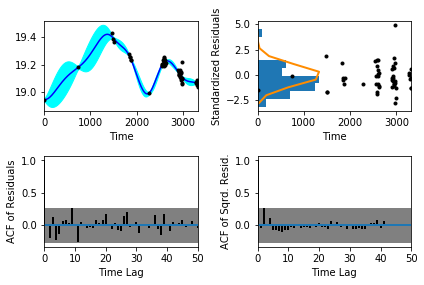

In [5]:
sample.assess_fit()

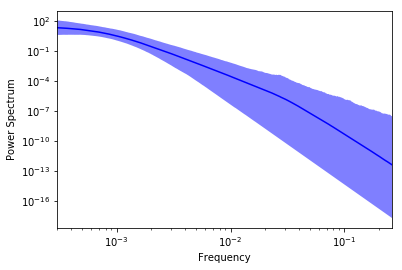

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68557_R')

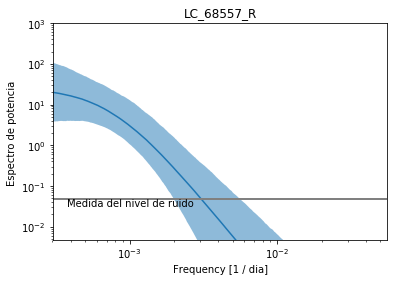

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68557_R')

Text(0.5,1,'Prediccion , valor esperado LC_68557_R')

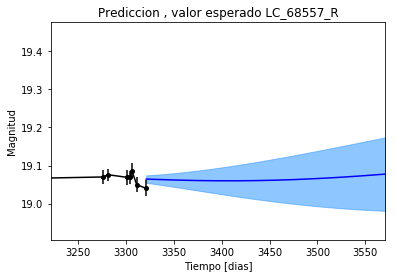

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68557_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_68557_R')

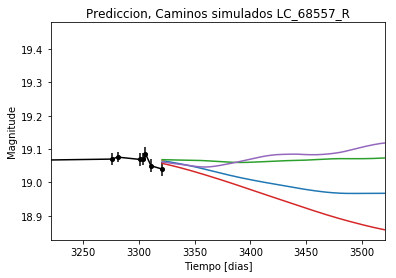

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68557_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68557_R')

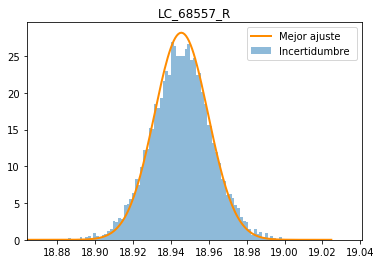

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68557_R')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_R')

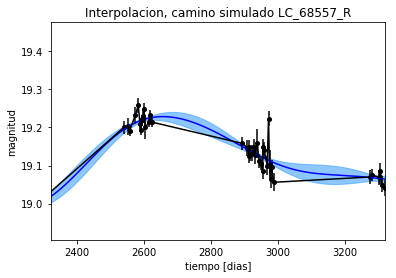

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_R')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_R')

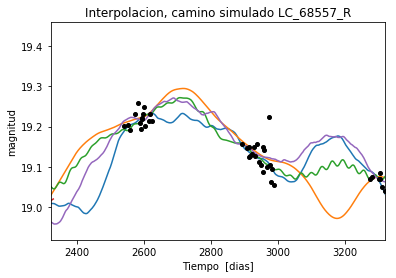

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1346.61816615
Median: 0.0039165478063
Standard deviation: 0.0934669340567
68% credibility interval: [ 0.00053468  0.08432702]
95% credibility interval: [  3.32876818e-04   3.60424672e-01]
99% credibility interval: [  3.09159222e-04   4.92193448e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 773.342103447
Median: 0.000806439919482
Standard deviation: 0.0327578042001
68% credibility interval: [ 0.00039591  0.00682096]
95% credibility interval: [ 0.00031434  0.09445968]
99% credibility interval: [ 0.00030405  0.24683725]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 539.985491532
Median: 0.00384112335975
Standard deviati

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1108.74916316
Median: 119.826194583
Standard deviation: 1.5495692928
68% credibility interval: [ 118.04405313  120.90147678]
95% credibility interval: [ 115.66913061  121.54664035]
99% credibility interval: [ 113.80322232  121.8140118 ]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 448.719511651
Median: 0.248184907927
Standard deviation: 0.961113101861
68% credibility interval: [ 0.02507011  1.66930617]
95% credibility interval: [ 0.01092161  3.26578972]
99% credibility interval: [ 0.00888351  4.23469728]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 739.021735192
Median: 0.0456121494806
Standard deviation: 1.80717080198
68% credibility interval: [ 0.00167726  1.14343872]
95% credibility interval: [  1.58110723e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20019.4809955
Median: 3.92073508103e-39
Standard deviation: 2.24266454569e+70
68% credibility interval: [  1.43585275e-88   6.68651000e-09]
95% credibility interval: [  1.51503616e-120   2.89768727e+034]
99% credibility interval: [  2.93793885e-141   3.24024413e+060]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1803.03999224
Median: 19.1400511415
Standard deviation: 0.109676837475
68% credibility interval: [ 19.04307534  19.22190803]
95% credibility interval: [ 18.90116556  19.34476956]
99% credibility interval: [ 18.77735201  19.47435115]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 809.207019886
Median: 0.000725148094595
Standard deviation: 0.108292673002
68% credibility interval: [ 0.          0.11933451]
95% credibility interval: [ 0.         0.4081974]
99% credibility interval: [ 0.          0.49640001]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 809.207019886
Median: 0.000725148094595
Standard deviation: 0.108292673002
68% credibility interval: [ 0.          0.11933451]
95% credibility interval: [ 0.         0.4081974]
99% credibility interval: [ 0.          0.49640001]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2325.08861123
Median: 0.0
Standard deviation: 0.000278653580624
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1108.74916316
Median: 119.826194583
Standard deviation: 1.5495692928
68% credibility interval: [ 118.04405313  120.90147678]
95% credibility interval: [ 115.66913061  121.54664035]
99% credibility interval: [ 113.80322232  121.8140118 ]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1422.72644346
Median: 0.032530646131
Standard deviation: 0.0460009954214
68% credibility interval: [ 0.01782951  0.06738582]
95% credibility interval: [ 0.01099368  0.15846865]
99% credibility interval: [ 0.00832036  0.30435846]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2056.38128501
Median: 1.36028918754
Standard deviation: 0.200569394754
68% credibility interval: [ 1.16938673  1.57167985]
95% credibility interval: [ 1.01574465  1.80008697]
99% credibility interval: [ 0.92579967  1.91743397]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2681.98035648
Median: 4.09547643563e-06
Standard deviation: 0.000997276636201
68% credibility interval: [  1.01626360e-07   1.17109679e-04]
95% credibility interval: [  1.22495990e-39   8.15958312e-04]
99% credibility interval: [  3.51395236e-67   2.41084468e-03]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1346.61816615
Median: (-0.0246083956314-0.11198647167j)
Standard deviation: 0.898811157894
68% credibility interval: [-0.52984228+0.j         -0.00335951-0.07343999j]
95% credibility interval: [ -2.26461500e+00+0.j          -2.09152673e-03-0.16587743j]
99% credibility interval: [ -3.09254264e+00+0.j          -1.94250468e-03-0.00699877j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 773.342103447
Median: (-0.00506701145321+0.299642026243j)
Standard deviation: 0.71087173196
68% credibility interval: [-0.04285733+0.72078519j -0.00248760+0.67493054j]
95% credibility interval: [-0.59350770+0.97778004j -0.00197504+0.j        ]
99% credibility interval: [-1.55092419+3.06245355j -0.00191042+0.j        ]
Posterior summary for